# Example full run

An example of a complete run of the lephare with all stages required to estimate redshift.

Define the two environment variables necessary for Le Phare (directory of LEPHARE package, directory in which to store the libraries) and define the directory in which you run the code. 

In [1]:
import os
import lephare as lp
import numpy as np
from matplotlib import pylab as plt

%matplotlib inline

Lephare default working directory already exists at
                    /Users/rshirley/Library/Caches/lephare/work.


## Set up the parameters


Read the parameter file and store the keywords in a keywords map.

In [2]:
config_file = "./data/COSMOS.para"
keymap = lp.read_config(config_file)
#Get the auxiliary files required.
lp.data_retrieval.get_auxiliary_data(
    keymap=keymap,
    additional_files=["examples/COSMOS.in","examples/config.yml"])

Number of keywords read in the config file: 86
File downloaded and saved as data_registry.txt
Checking/downloading 595 files...
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z2_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z4_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z5_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z6_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z7_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z8_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z10_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BETHERMIN12/sed_z11_MS.dat' is not in the registry.
Future completed with an exception: File 'sed/GAL/#BET

Modification of three keywords of the parameter file. Verbose must be NO in the notebook.

In [3]:
keymap["ZPHOTLIB"] = lp.keyword("ZPHOTLIB", "VISTA_COSMOS_FREE,ALLSTAR_COSMOS,QSO_COSMOS")
keymap["SPEC_OUT"] = lp.keyword("SPEC_OUT", "save_spec")
keymap["VERBOSE"] = lp.keyword("VERBOSE", "NO")
keymap["AUTO_ADAPT"] = lp.keyword("AUTO_ADAPT", "YES")

If adaption of the zero-points is turned off and you want to apply your own shift

In [4]:
# keymap["AUTO_ADAPT"]= keyword("AUTO_ADAPT","NO")
# keymap["APPLY_SYSSHIFT"]= keyword("APPLY_SYSSHIFT","0.049,-0.013,-0.055,-0.065,-0.042,-0.044,-0.065,-0.0156,-0.002,0.052,-0.006,0.071,0.055,0.036,0.036,0.054,0.088,0.019,-0.154,0.040,0.044,0.060,0.045,0.022,0.062,0.033,0.015,0.012,0.0,0.0]

## Create filter library

Read the filter names to be used in COSMOS.para and generate the filter file

First, you can use the standard method with the list of filters in the parameter file. The filters are store in the LEPHAREDIR/filt directory. You can pass either the config file or the keymap as argument

In [5]:
filterLib = lp.Filter(config_file=config_file)
# uncomment to test passing the keymap
# filterLib = Filter(config_keymap=keymap)
filterLib.run()

# NAME                        IDENT      Lbda_mean Lbeff(Vega)       FWHM     AB-cor    TG-cor      VEGA M_sun(AB)   CALIB      Lb_eff    Fac_corr
u_cfht.lowres                 1             0.3852      0.3914      0.0497    0.3015   -0.3939  -20.6252    6.0220       0      0.3823      1.0000
u_new.pb                      2             0.3695      0.3754      0.0414    0.6072   -0.2801  -20.8437    6.3096       0      0.3673      1.0000
gHSC.pb                       3             0.4867      0.4778      0.1090   -0.0838   -0.2382  -20.7373    5.0673       0      0.4798      1.0000
rHSC.pb                       4             0.6257      0.6158      0.1526    0.1498    0.2628  -21.5230    4.6501       0      0.6194      1.0000
iHSC.pb                       5             0.7729      0.7649      0.1477    0.3962    0.6163  -22.2342    4.5318       0      0.7679      1.0000
zHSC.pb                       6             0.8918      0.8910      0.0767    0.5167    0.7622  -22.6738    4.5147    

Second, you can use the filterSvc helper class to gain more freedom. This class allows to retrieve the list of filt objetcs, independently of writing them on file.

In [6]:
filterLib = lp.FilterSvc.from_config(config_file)
filter_output = os.path.join(os.environ["LEPHAREWORK"], "filt", keymap["FILTER_FILE"].value)
lp.write_output_filter(filter_output + ".dat", filter_output + ".doc", filterLib)

# NAME                        IDENT      Lbda_mean Lbeff(Vega)       FWHM     AB-cor    TG-cor      VEGA M_sun(AB)   CALIB      Lb_eff    Fac_corr
u_cfht.lowres                 1             0.3844      0.3908      0.0538    0.3150   -0.3891  -20.6345    6.0327       0      0.3815      1.0000
u_new.pb                      2             0.3690      0.3750      0.0456    0.6195   -0.2745  -20.8527    6.3135       0      0.3668      1.0000
gHSC.pb                       3             0.4851      0.4760      0.1194   -0.0860   -0.2458  -20.7272    5.0764       0      0.4780      1.0000
rHSC.pb                       4             0.6241      0.6142      0.1539    0.1466    0.2580  -21.5143    4.6523       0      0.6178      1.0000
iHSC.pb                       5             0.7716      0.7637      0.1476    0.3942    0.6138  -22.2286    4.5323       0      0.7666      1.0000
zHSC.pb                       6             0.8915      0.8907      0.0768    0.5169    0.7625  -22.6733    4.5147    

It also allows to load the filters from a yaml file, with the possibility to query the SVO service for filters

In [7]:
!ls $LEPHAREDIR/examples/

COSMOS.in       COSMOS_MOD.list config.yml


In [8]:
filterLibSVO = lp.FilterSvc.from_yaml(f"{lp.LEPHAREDIR}/examples/config.yml")
filter_output = os.path.join(os.environ["LEPHAREWORK"], "filt", keymap["FILTER_FILE"].value)
lp.write_output_filter(filter_output + "_svo.dat", filter_output + "_svo.doc", filterLib)

# NAME                        IDENT      Lbda_mean Lbeff(Vega)       FWHM     AB-cor    TG-cor      VEGA M_sun(AB)   CALIB      Lb_eff    Fac_corr
u_cfht.lowres                 1             0.3844      0.3908      0.0538    0.3150   -0.3891  -20.6345    6.0327       0      0.3815      1.0000
u_new.pb                      2             0.3690      0.3750      0.0456    0.6195   -0.2745  -20.8527    6.3135       0      0.3668      1.0000
gHSC.pb                       3             0.4851      0.4760      0.1194   -0.0860   -0.2458  -20.7272    5.0764       0      0.4780      1.0000
rHSC.pb                       4             0.6241      0.6142      0.1539    0.1466    0.2580  -21.5143    4.6523       0      0.6178      1.0000
iHSC.pb                       5             0.7716      0.7637      0.1476    0.3942    0.6138  -22.2286    4.5323       0      0.7666      1.0000
zHSC.pb                       6             0.8915      0.8907      0.0768    0.5169    0.7625  -22.6733    4.5147    

Plot the filters

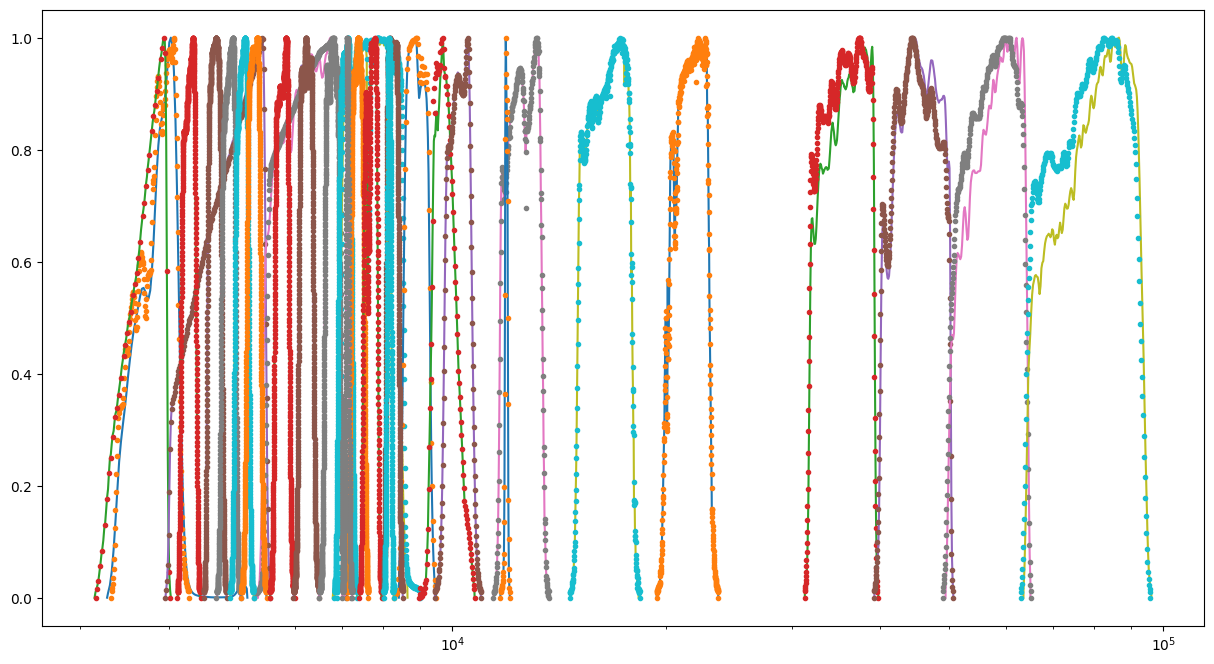

In [9]:
fig = plt.figure(figsize=(15, 8))
for f, fsvo in zip(filterLib, filterLibSVO):
    d = f.data()
    plt.semilogx(d[0], d[1] / d[1].max())
    dsvo = fsvo.data()
    plt.semilogx(dsvo[0], dsvo[1] / dsvo[1].max(), ".")

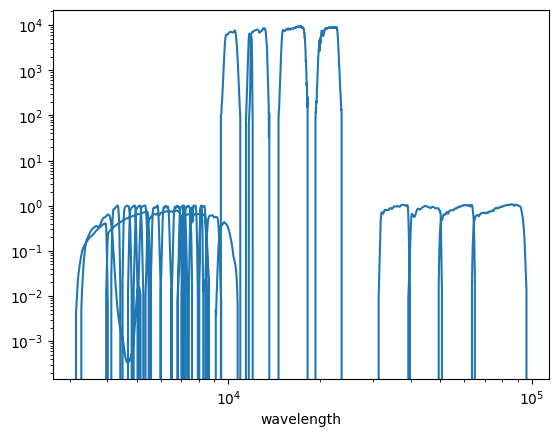

In [10]:
# filter_output = os.path.join(os.environ["LEPHAREWORK"],"filt", filterLib.keymap['FILTER_FILE'].value + ".dat")
filters = np.loadtxt(
    filter_output + ".dat", dtype={"names": ("lamb", "val", "bid"), "formats": (float, float, int)}
)
plt.loglog(filters["lamb"], filters["val"])
plt.xlabel("wavelength");

## Create SED library

SED objects represent SED templates belonging to one of the three possible classes "STAR", "QSO" (for AGN type of objects), and "GAL" for galaxies. SED templates available with LePhare can be found under the `sed` directory. 

In [11]:
sedlib = lp.Sedtolib(config_keymap=keymap)

In [12]:
sedlib.run(typ="STAR", star_sed="$LEPHAREDIR/sed/STAR/STAR_MOD_ALL.list")

#######################################
# It s translating SEDs to binary library #
# with the following options :           
# Config file     : 
# Library type     : STAR
# STAR_SED    :/Users/rshirley/Library/Caches/lephare/data/sed/STAR/STAR_MOD_ALL.list
# STAR_LIB    :LIB_STAR
# STAR_LIB doc:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_STAR.doc
# STAR_FSCALE :0.0000
#######################################
Number of SED in the list 254


In [13]:
sedlib.run(typ="QSO", qso_sed="$LEPHAREDIR/sed/QSO/SALVATO09/AGN_MOD.list", gal_lib="LIB_QSO")

#######################################
# It s translating SEDs to binary library #
# with the following options :           
# Config file     : 
# Library type     : QSO
# QSO_SED    :/Users/rshirley/Library/Caches/lephare/data/sed/QSO/SALVATO09/AGN_MOD.list
# QSO_LIB    :LIB_QSO
# QSO_LIB doc:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_QSO.doc
# QSO_FSCALE :1.0000
#######################################
Number of SED in the list 14


In [14]:
sedlib.run(typ="GAL", gal_sed="$LEPHAREDIR/examples/COSMOS_MOD.list", gal_lib="LIB_GAL")

#######################################
# It s translating SEDs to binary library #
# with the following options :           
# Config file     : 
# Library type     : GAL
# GAL_SED    :/Users/rshirley/Library/Caches/lephare/data/examples/COSMOS_MOD.list
# GAL_LIB    :LIB_GAL
# GAL_LIB doc:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_GAL.doc
# GAL_LIB phys:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_GAL.phys
# SEL_AGE    :none
# GAL_FSCALE :1.0000
# AGE_RANGE   0.0000 15000000000.0000
#######################################
Number of SED in the list 31


## Create a magnitude library

Use the SED library to create a magnitude library

In [15]:
maglib = lp.MagGal(config_keymap=keymap)

In [16]:
maglib.run(typ="STAR", lib_ascii="YES", star_lib_out="ALLSTAR_COSMOS")

WRONG NUMBER OF ARGUMENTS FOR OPTION MOD_EXTINC
We have 2 instead of 8
Use default value 0,0 for all filters 
 All files opened 
#######################################
# It s computing the SYNTHETIC MAGNITUDES #
# For Gal/QSO libraries with these OPTIONS #
# with the following options :           
# Config file     : 
# Filter file     : filter_cosmos
# Magnitude type     : AB
# COSMOLOGY   :70.0000,0.3000,0.7000
# STAR_LIB_IN    :/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_STAR(.doc & .bin)
# STAR_LIB_OUT   :/Users/rshirley/Library/Caches/lephare/work/lib_mag/ALLSTAR_COSMOS(.doc & .bin)
# LIB_ASCII   YES
# CREATION_DATE Fri Apr  5 23:19:00 2024
#############################################


In [17]:
maglib.run(
    typ="QSO",
    lib_ascii="YES",
    mod_extinc="0,1000",
    eb_v="0.,0.1,0.2,0.3",
    extinc_law="SB_calzetti.dat",
    qso_lib_in="LIB_QSO",
)

 All files opened 
#######################################
# It s computing the SYNTHETIC MAGNITUDES #
# For Gal/QSO libraries with these OPTIONS #
# with the following options :           
# Config file     : 
# Filter file     : filter_cosmos
# Magnitude type     : AB
# QSO_LIB_IN    :/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_QSO(.doc & .bin)
# QSO_LIB_OUT   :/Users/rshirley/Library/Caches/lephare/work/lib_mag/QSO_COSMOS(.doc & .bin)
# ZGRID_TYPE   :0
# Z_STEP   :0.0100 0.0000 7.0000
# COSMOLOGY   :70.0000,0.3000,0.7000
# EXTINC_LAW   :SB_calzetti.dat 
# MOD_EXTINC   :0 1000 
# EB_V   :0.0000 0.1000 0.2000 0.3000 # LIB_ASCII   YES
# CREATION_DATE Fri Apr  5 23:19:00 2024
#############################################


In [18]:
maglib.run(
    typ="GAL",
    lib_ascii="YES",
    gal_lib_in="LIB_GAL",
    gal_lib_out="VISTA_COSMOS_FREE",
    mod_extinc="18,26,26,33,26,33,26,33",
    extinc_law="SMC_prevot.dat,SB_calzetti.dat,SB_calzetti_bump1.dat,SB_calzetti_bump2.dat",
    em_lines="EMP_UV",
    em_dispersion="0.5,0.75,1.,1.5,2.",
)

 All files opened 
#######################################
# It s computing the SYNTHETIC MAGNITUDES #
# For Gal/QSO libraries with these OPTIONS #
# with the following options :           
# Config file     : 
# Filter file     : filter_cosmos
# Magnitude type     : AB
# GAL_LIB_IN    :/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_GAL(.doc & .bin)
# GAL_LIB_OUT   :/Users/rshirley/Library/Caches/lephare/work/lib_mag/VISTA_COSMOS_FREE(.doc & .bin)
# ZGRID_TYPE   :0
# Z_STEP   :0.0100 0.0000 7.0000
# COSMOLOGY   :70.0000,0.3000,0.7000
# EXTINC_LAW   :SMC_prevot.dat SB_calzetti.dat SB_calzetti_bump1.dat SB_calzetti_bump2.dat 
# MOD_EXTINC   :18 26 26 33 26 33 26 33 
# EB_V   :0.0000 0.1000 0.2000 0.3000 
# EM_LINES   EMP_UV
# EM_DISPERSION   0.5000,0.7500,1.0000,1.5000,2.0000,
# LIB_ASCII   YES
# CREATION_DATE Fri Apr  5 23:19:04 2024
#############################################


## Run the photoz

Read the parameter file and store the keywords. Example with the modification of three keywords of the parameter file. Verbose must be NO in the notebook.

In [19]:
keymap = lp.read_config(config_file)
keymap["ZPHOTLIB"] = lp.keyword("ZPHOTLIB", "VISTA_COSMOS_FREE,ALLSTAR_COSMOS,QSO_COSMOS")
keymap["SPEC_OUT"] = lp.keyword("SPEC_OUT", "save_spec")
keymap["VERBOSE"] = lp.keyword("VERBOSE", "NO")

Number of keywords read in the config file: 86


Instantiate the photo-z run with the above parameters.

In [20]:
photz = lp.PhotoZ(keymap)

####################################### 
# PHOTOMETRIC REDSHIFT with OPTIONS   # 
# Config file            : 
# CAT_IN                 : bidon
# CAT_OUT                : zphot.out
# CAT_LINES              : 0 1000000000
# PARA_OUT               : /Users/rshirley/Library/Caches/lephare/data/examples/output.para
# INP_TYPE               : F
# CAT_FMT[0:MEME 1:MMEE] : 0
# CAT_MAG                : AB
# ZPHOTLIB               : VISTA_COSMOS_FREE ALLSTAR_COSMOS QSO_COSMOS 
# FIR_LIB                : 
# FIR_LMIN               : 7.000000
# FIR_CONT               : -1.000000
# FIR_SCALE              : -1.000000
# FIR_FREESCALE          : YES
# FIR_SUBSTELLAR         : NO
# ERR_SCALE              : 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.050000 0.050000 0.050000 0.050000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.020000 0.050000 0.050000 0.050000 0.050000 0.100000 0.200000 0.300000 
# ERR_FACTOR             : 1.50

Read the input file with the following information: id, flux and associated uncertainties in all bands, a context indicating which bands to use in the fit (0 indicates all bands), and a spectrocopic redshift if it exists. 

In [21]:
cat = np.loadtxt(f"{lp.LEPHAREDIR}/examples/COSMOS.in")
id = cat[:, 0]
fluxes = cat[:, 1:60:2]
efluxes = cat[:, 2:61:2]
context = cat[:, 61]
zspec = cat[:, 62]
print("Check format with context and zspec :", context, zspec)

Check format with context and zspec : [0. 0. 0. ... 0. 0. 0.] [4.839  1.166  0.1649 ... 0.214  0.3053 0.3448]


Create a list of sources with a spec-z. Use for the zero-point training or any validation run.


In [22]:
srclist = []
zspec_mask = np.logical_and(zspec > 0.01, zspec < 6)
for i in np.where(zspec_mask)[0]:
    oneObj = lp.onesource(i, photz.gridz)
    oneObj.readsource(str(id[i]), fluxes[i, :], efluxes[i, :], int(context[i]), zspec[i], " ")
    photz.prep_data(oneObj)
    srclist.append(oneObj)
print("Sources with a spec-z: ", len(srclist))

Sources with a spec-z:  18416


Derive the zero-points offsets. Here, this option is commented and zero-points are assumed to be know.


In [23]:
a0, a1 = photz.run_autoadapt(srclist)
offsets = ",".join(np.array(a0).astype(str))
offsets = "# Offsets from auto-adapt: " + offsets + "\n"
print(offsets)

 Done with iteration 1 and converge 0
# Offsets from auto-adapt: 0.056598187813420964,-0.005298572914817612,-0.05762301824312743,-0.07183338052646349,-0.044066182223900796,-0.04134595595763457,-0.06426549639479973,-0.01452044600291913,-0.0055860249850887556,0.04621337036981288,-0.01528461576844009,0.07262688205857515,0.05170926126354658,0.03073797284620028,0.03037400814830704,0.04690291310705064,0.08204846481963557,0.011463065911076598,-0.15830826817311205,0.037159826185785505,0.041348065394320344,0.062287289576040905,0.04876980479349413,0.02104769869227141,0.06568397023721673,0.032712145730869224,-0.005869169250047435,-0.01845485767344357,0.0,0.0

 Done with iteration 2 and converge 1


Create the list of sources for which we want a photo-z. here, limited to the 100 first sources.

In [24]:
photozlist = []
for i in range(100):
    oneObj = lp.onesource(i, photz.gridz)
    oneObj.readsource(str(id[i]), fluxes[i, :], efluxes[i, :], int(context[i]), zspec[i], " ")
    photz.prep_data(oneObj)
    photozlist.append(oneObj)
print("Number of sources to be analysed: ", len(srclist))

Number of sources to be analysed:  18416


Create the list of sources for which we want a photo-z. here, limited to the 100 first sources.

In [25]:
photz.run_photoz(photozlist[:100], a0, a1)
# If adaption of the zero-points is turned off
# photz.run_photoz(photozlist[:100], [],[] )

Create output in fits


In [26]:
t = photz.build_output_tables(photozlist[:100], para_out='./data/output.para', filename="outputpython.fits")

In [27]:
t[:5]

<Table length=5>
IDENT        Z_BEST              Z_MED            Z_MED68_LOW     ...          MAG_OBS()                   ERR_MAG_OBS()          STRING_INPUT             BAY_ZG           
 str5       float64             float64             float64       ...         float64[30]                   float64[30]               str1              float64[701]        
----- ------------------- ------------------- ------------------- ... ---------------------------- ------------------------------ ------------ -----------------------------
  1.0   4.703143882071358   4.679311665899609   4.607334052323049 ...             1000.0 .. 1000.0               1000.0 .. 1000.0              0.0 .. 2.6120842545579135e-64
  2.0  1.0858081949573175   1.091354854581044  1.0739136467505466 ... 24.823528777031047 .. 1000.0   0.0964327877384378 .. 1000.0                                 0.0 .. 0.0
  3.0 0.16521893105349592 0.16278995070203908 0.14505754043452873 ... 20.455816150467925 .. 1000.0 0.030183067850864845 .. 1000.0                          5.349e-320 .. 0.0
  4.0  5.3463402948846515  5.3368619967242275   5.244052437625292 ... 28.303047821698073 .. 1000.0   1.9744363436325476 .. 1000.0              0.0 .. 2.7773725054788945e-33
  5.0   0.863718850450098  0.8972719485112126   0.776584856567174 ...  28.54446872020207 .. 1000.0   2.1272798742731407 .. 1000.0                0.0 .. 2.78534302585269e-35

Create one ascii file per object to produce the best-fit template plot

In [28]:
# import time

# photz.write_outputs(photozlist[:100], int(time.time()))

Make the plot with all the file listed in save_spec

File: save_spec/Id94.0.spec


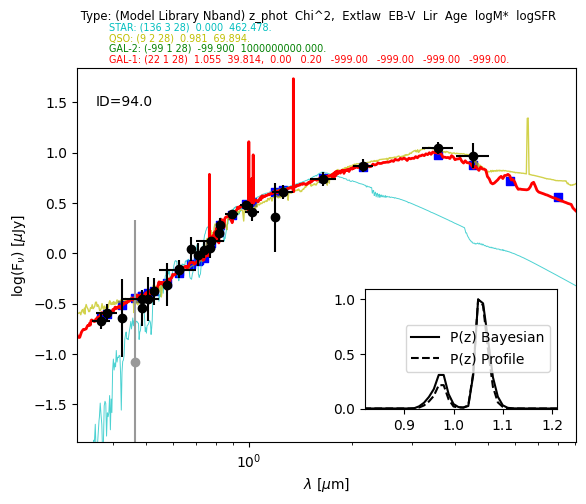

File: save_spec/Id98.0.spec


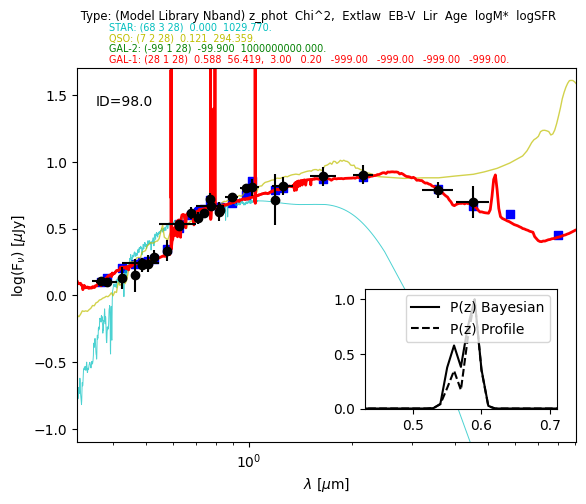

File: save_spec/Id7.0.spec


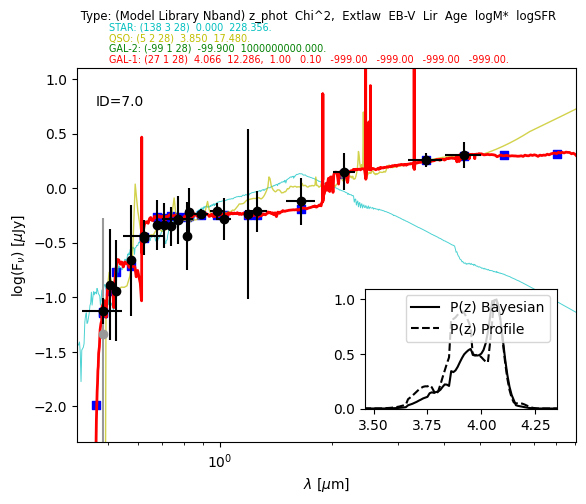

File: save_spec/Id86.0.spec


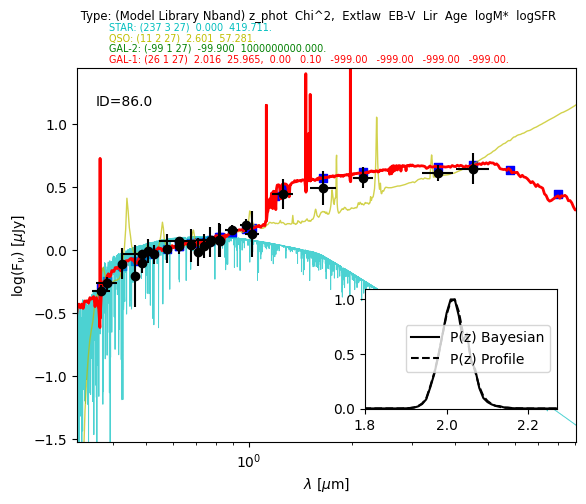

File: save_spec/Id75.0.spec


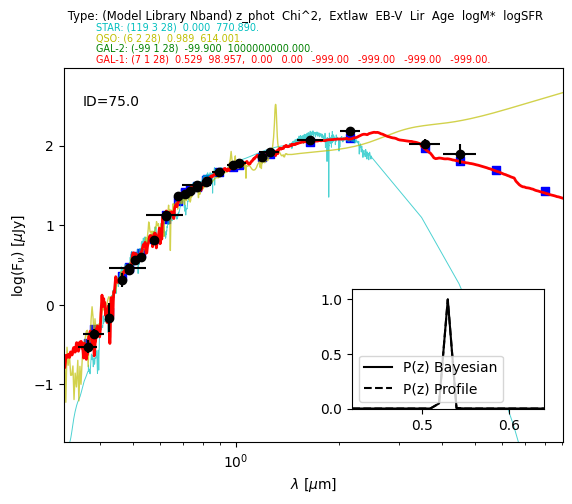

File: save_spec/Id16.0.spec


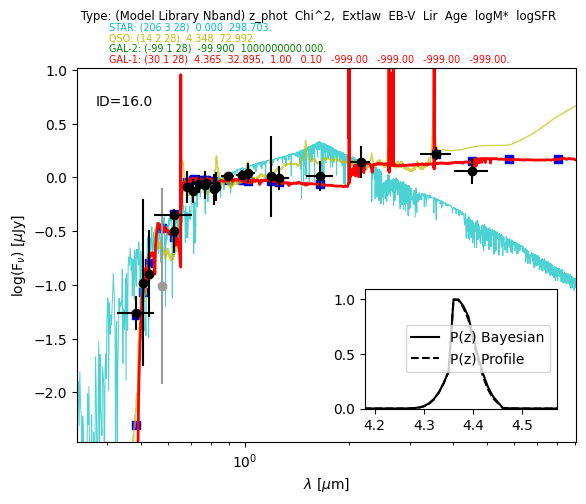

File: save_spec/Id67.0.spec


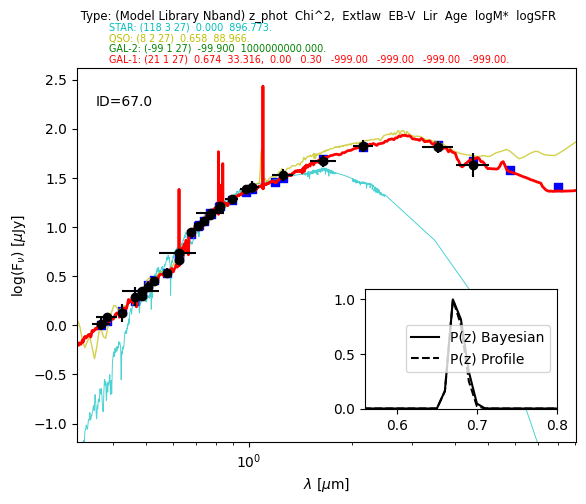

File: save_spec/Id79.0.spec


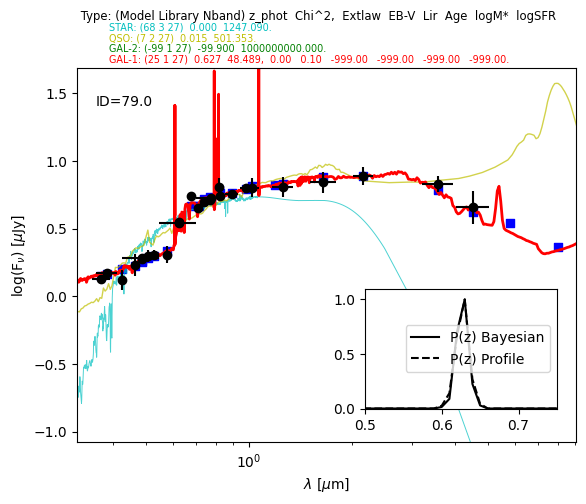

File: save_spec/Id51.0.spec


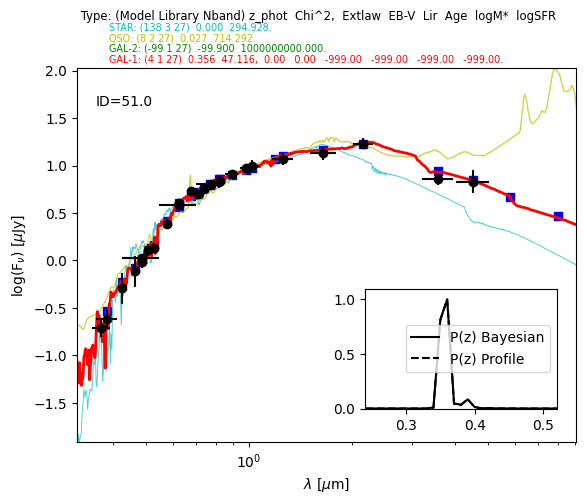

File: save_spec/Id32.0.spec


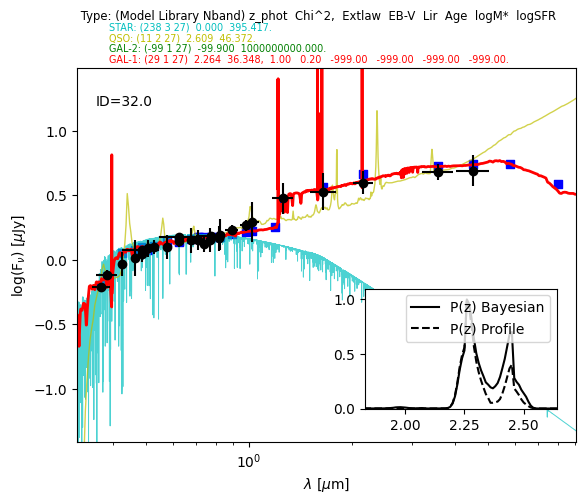

File: save_spec/Id43.0.spec


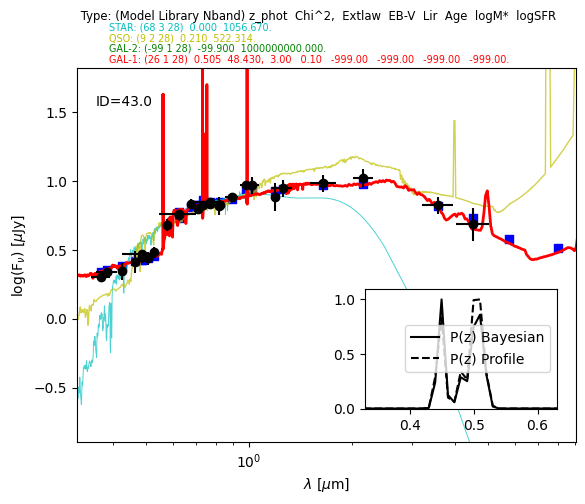

File: save_spec/Id20.0.spec


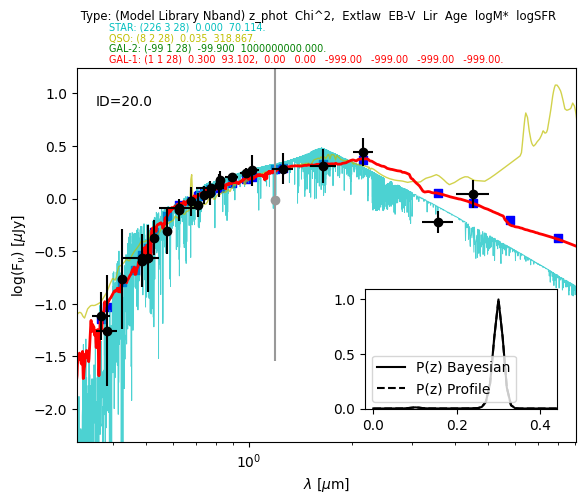

File: save_spec/Id65.0.spec


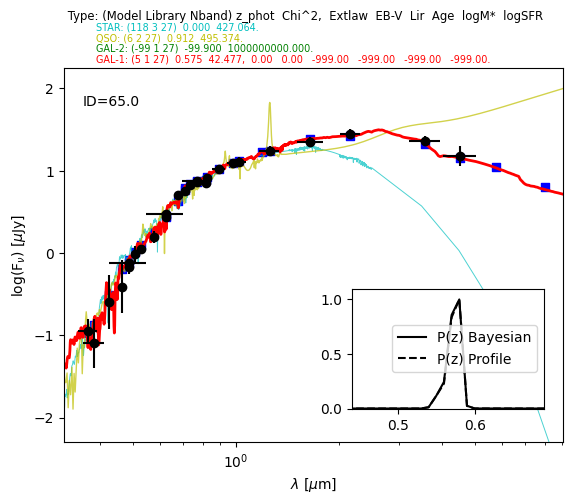

File: save_spec/Id18.0.spec


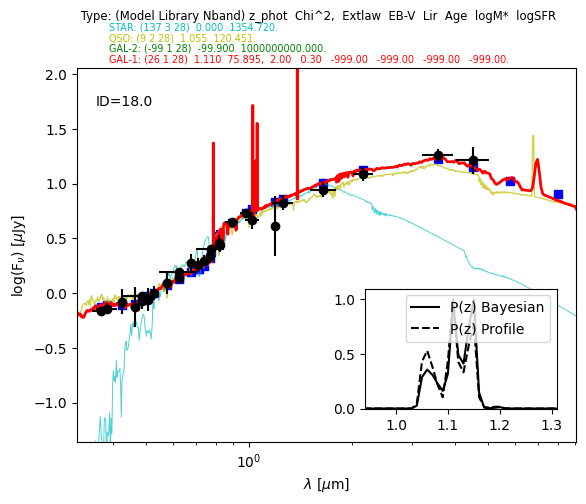

File: save_spec/Id69.0.spec


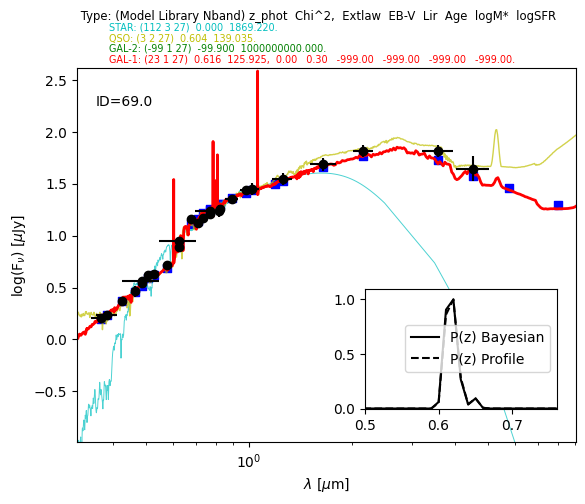

File: save_spec/Id14.0.spec


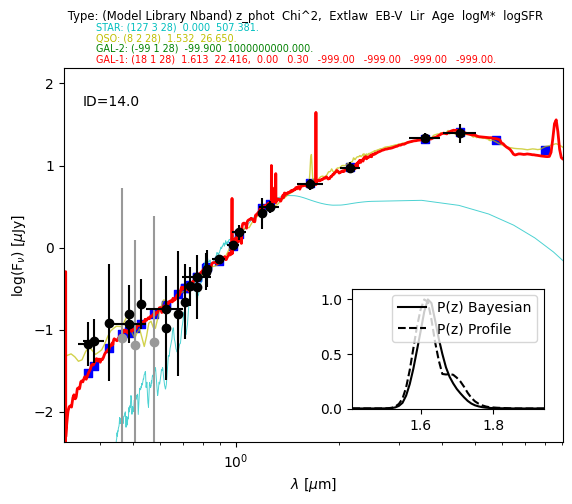

File: save_spec/Id77.0.spec


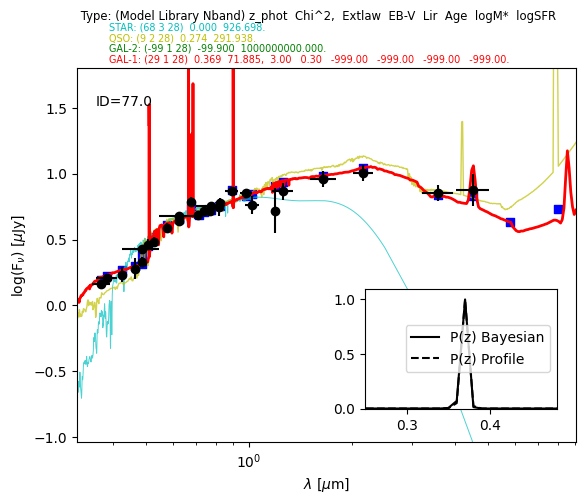

File: save_spec/Id22.0.spec


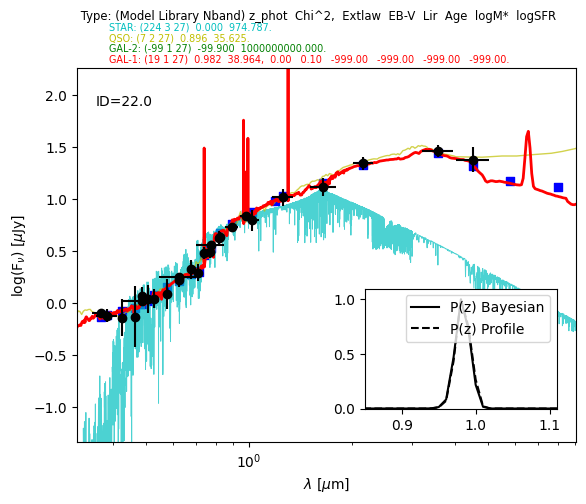

File: save_spec/Id41.0.spec


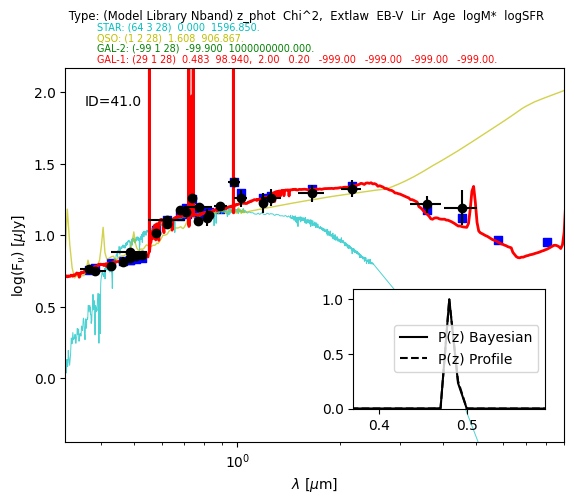

File: save_spec/Id100.0.spec


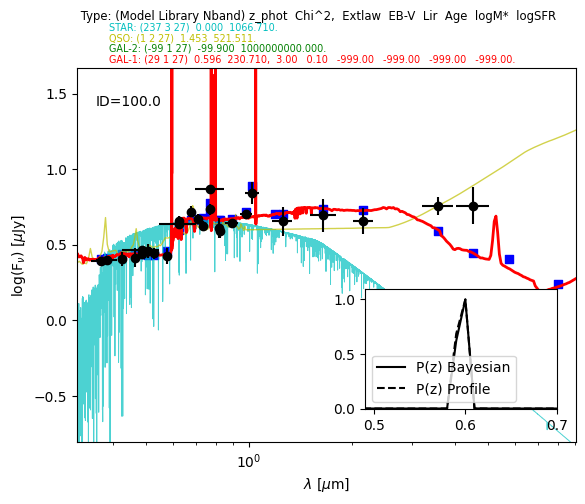

File: save_spec/Id30.0.spec


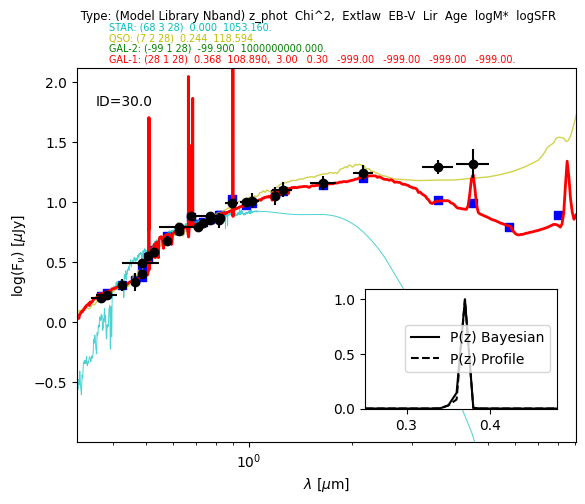

File: save_spec/Id53.0.spec


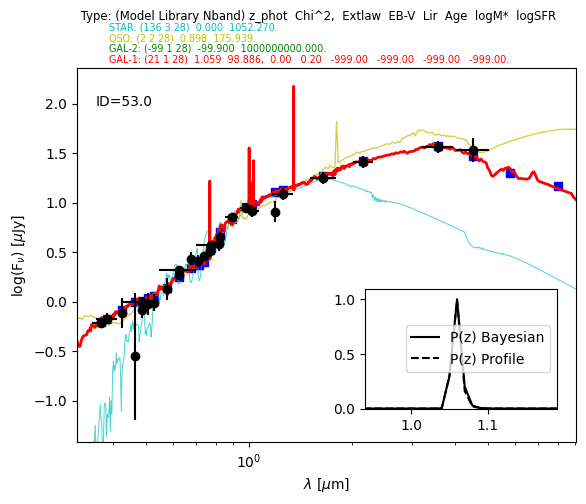

File: save_spec/Id5.0.spec


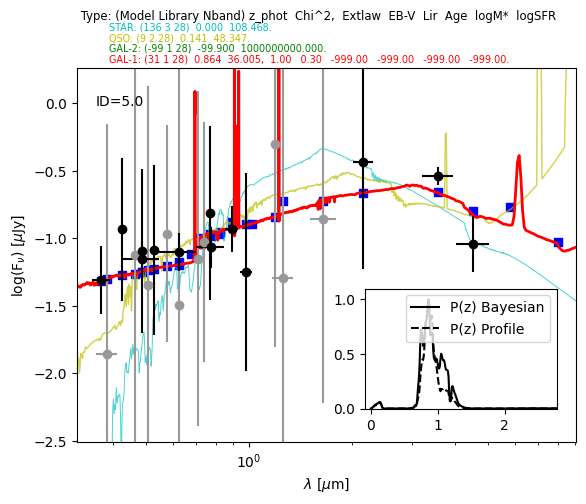

File: save_spec/Id84.0.spec


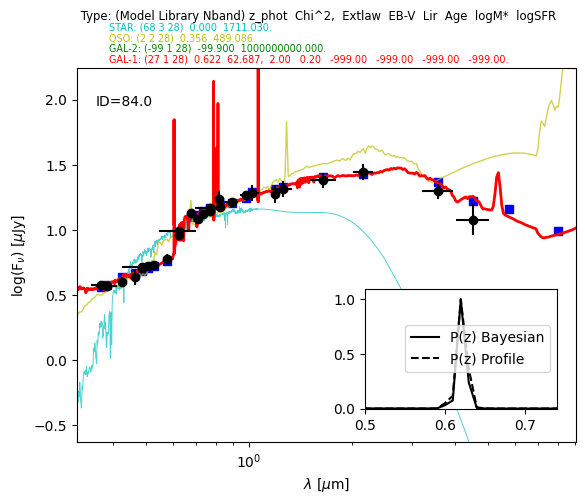

File: save_spec/Id96.0.spec


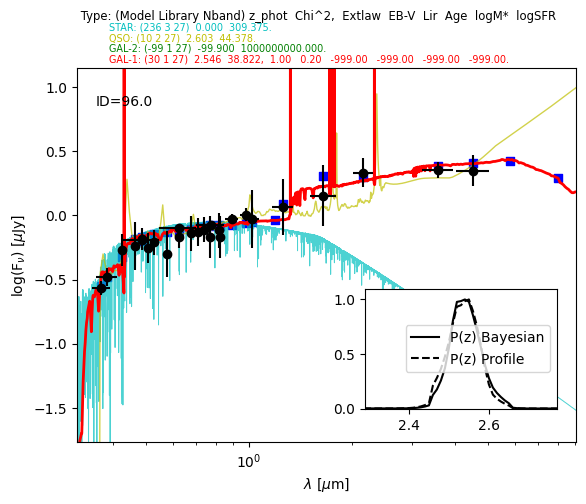

File: save_spec/Id9.0.spec


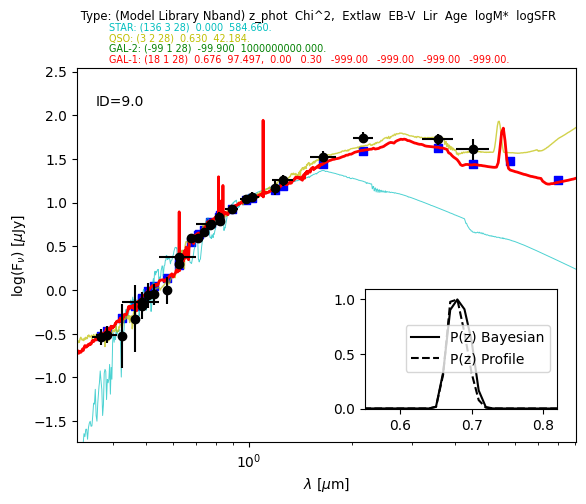

File: save_spec/Id88.0.spec


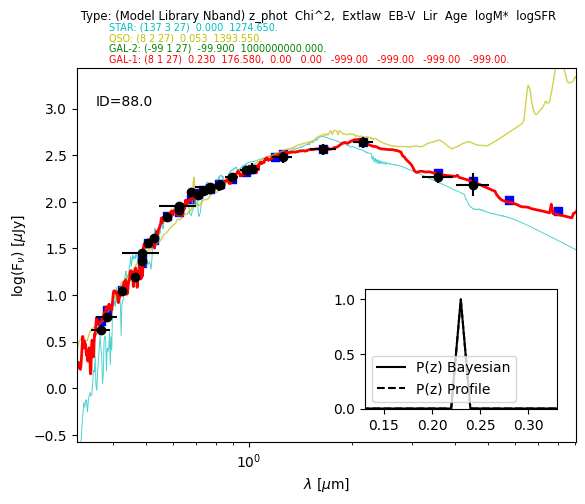

File: save_spec/Id34.0.spec


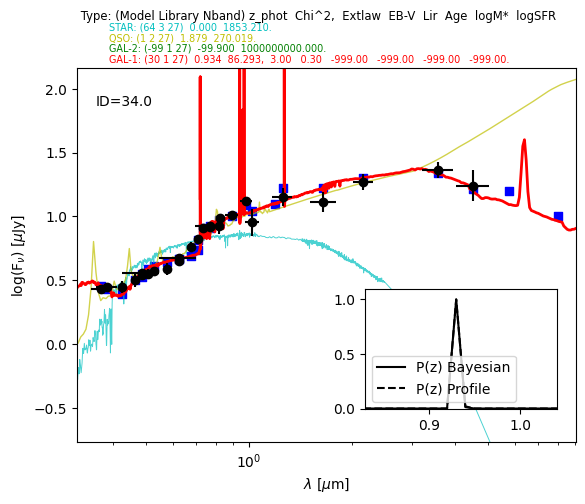

File: save_spec/Id49.0.spec


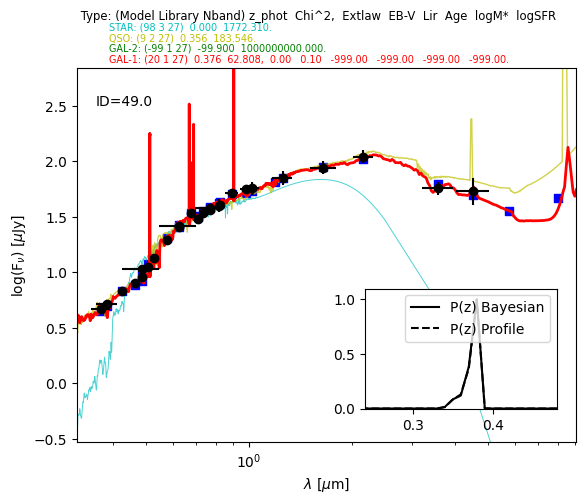

File: save_spec/Id57.0.spec


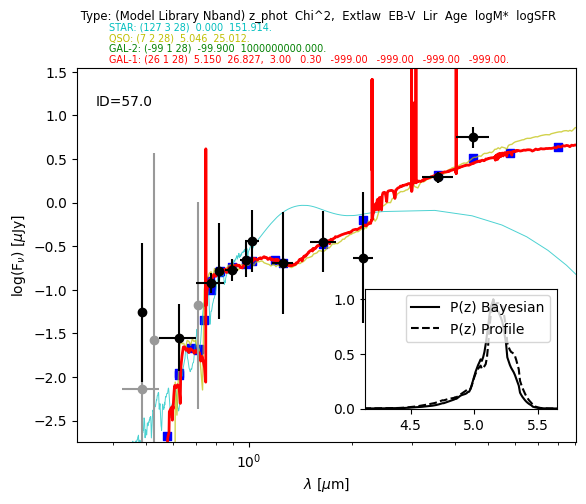

File: save_spec/Id26.0.spec


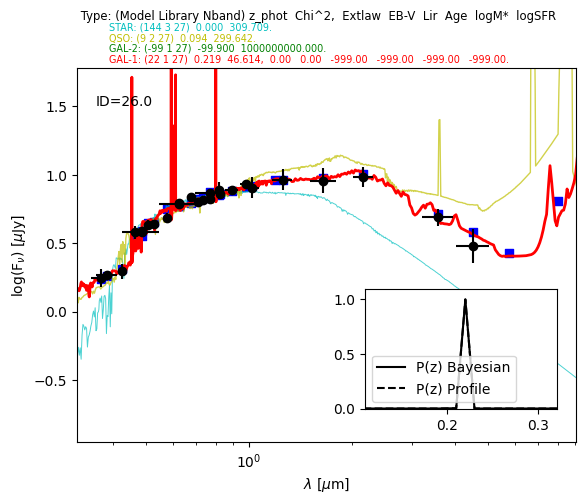

File: save_spec/Id38.0.spec


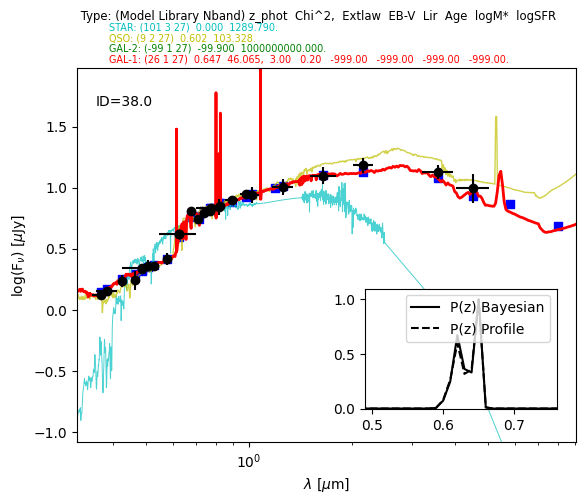

File: save_spec/Id45.0.spec


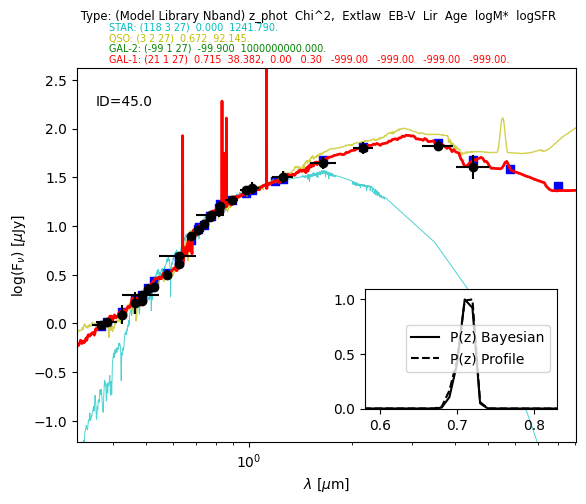

File: save_spec/Id10.0.spec


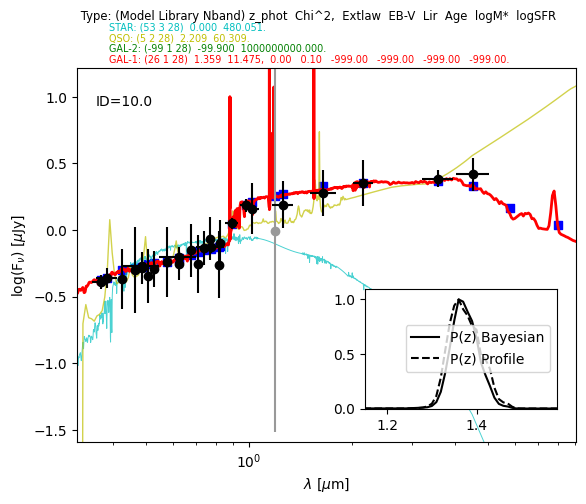

File: save_spec/Id73.0.spec


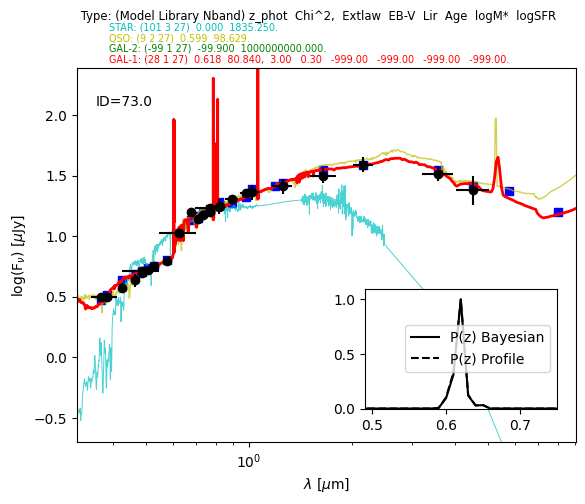

File: save_spec/Id61.0.spec


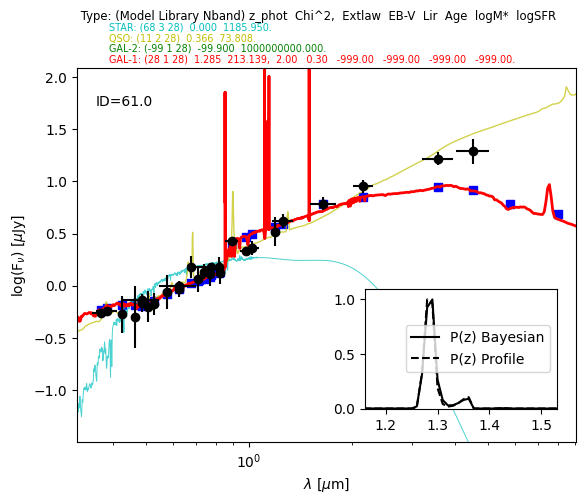

File: save_spec/Id92.0.spec


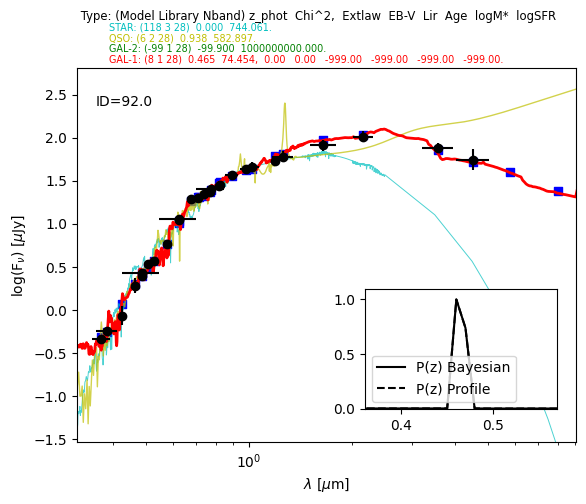

File: save_spec/Id80.0.spec


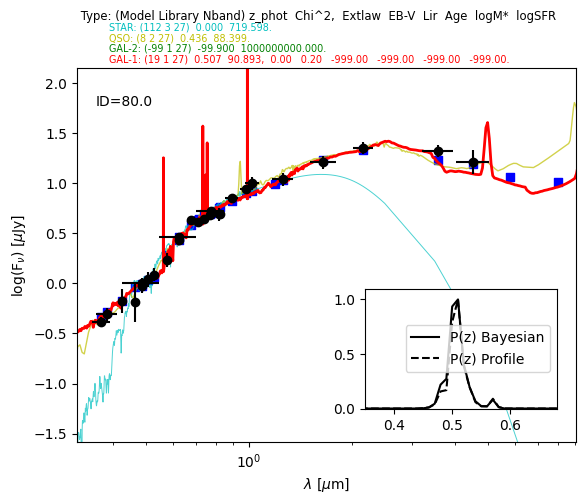

File: save_spec/Id1.0.spec


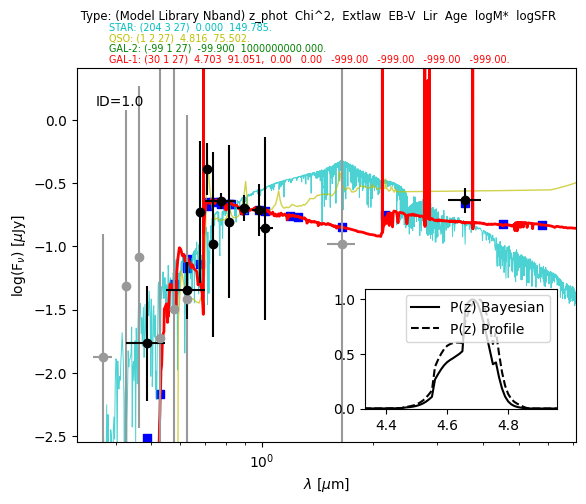

File: save_spec/Id82.0.spec


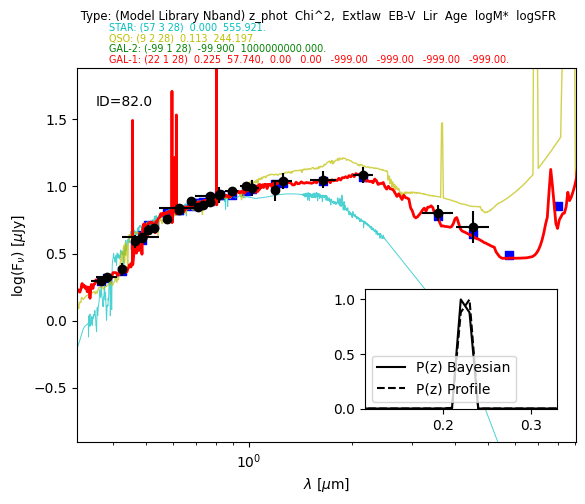

File: save_spec/Id3.0.spec


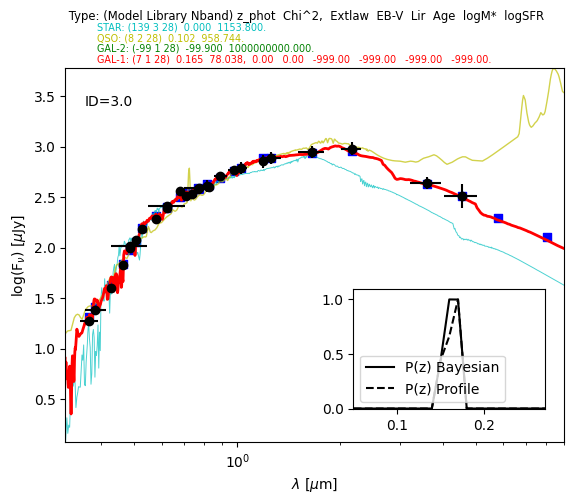

File: save_spec/Id90.0.spec


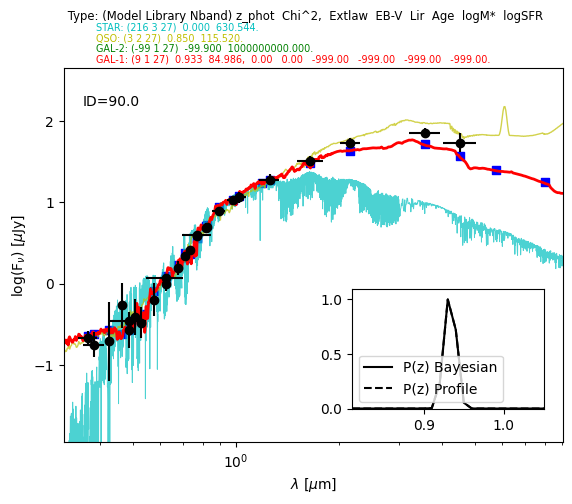

File: save_spec/Id47.0.spec


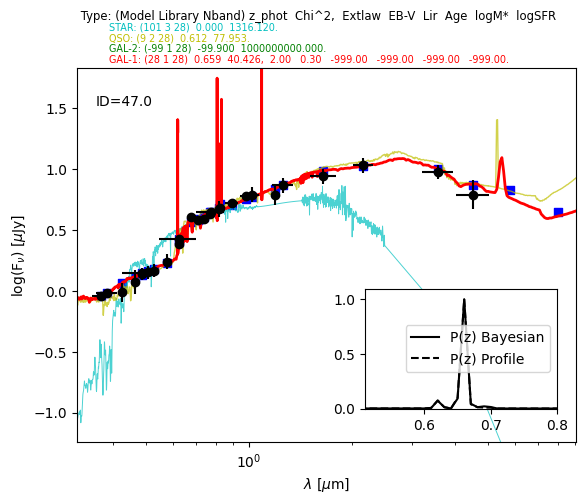

File: save_spec/Id24.0.spec


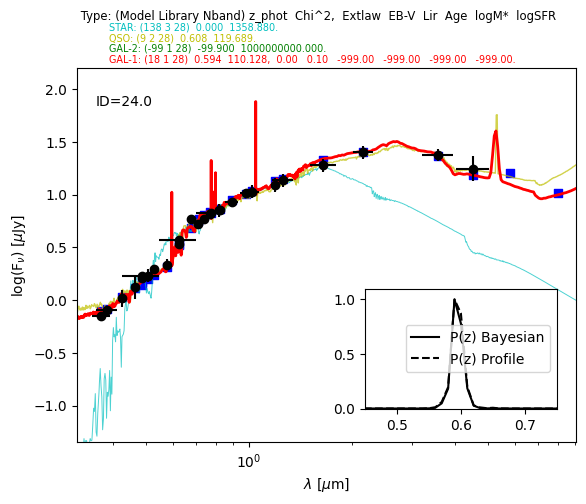

File: save_spec/Id59.0.spec


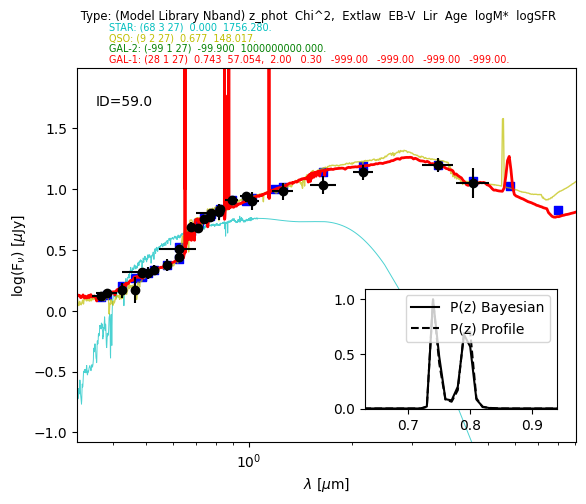

File: save_spec/Id28.0.spec


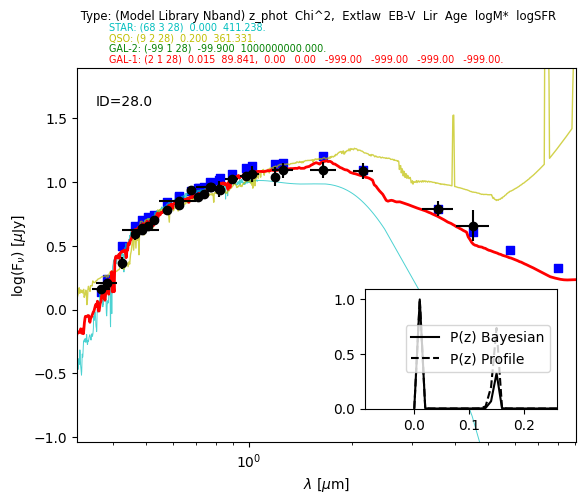

File: save_spec/Id55.0.spec


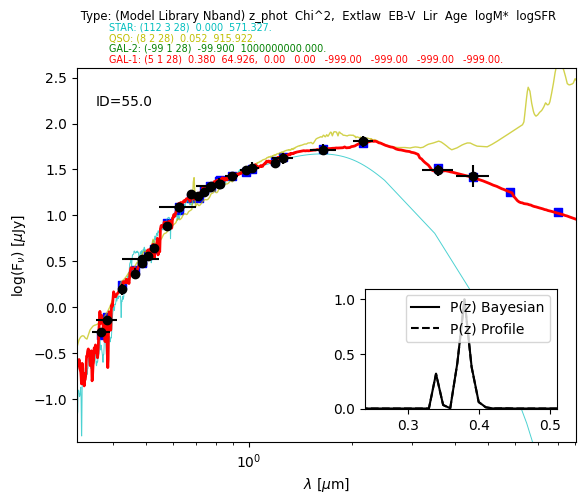

File: save_spec/Id36.0.spec


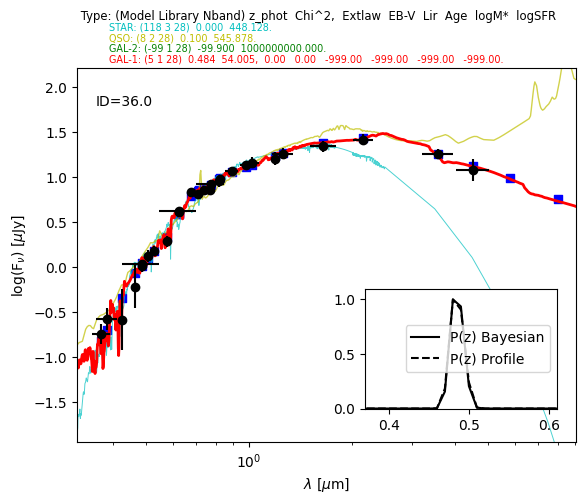

File: save_spec/Id63.0.spec


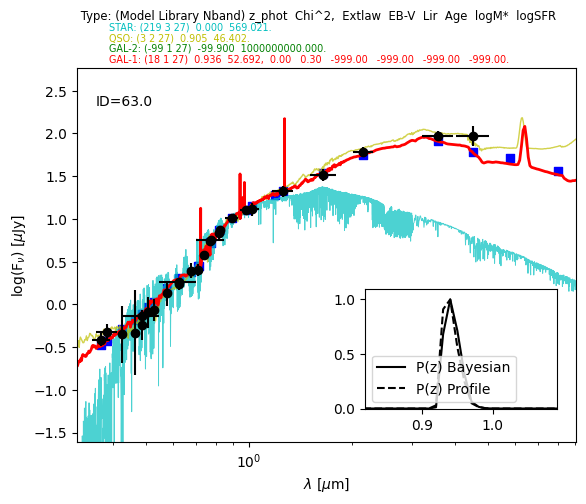

File: save_spec/Id71.0.spec


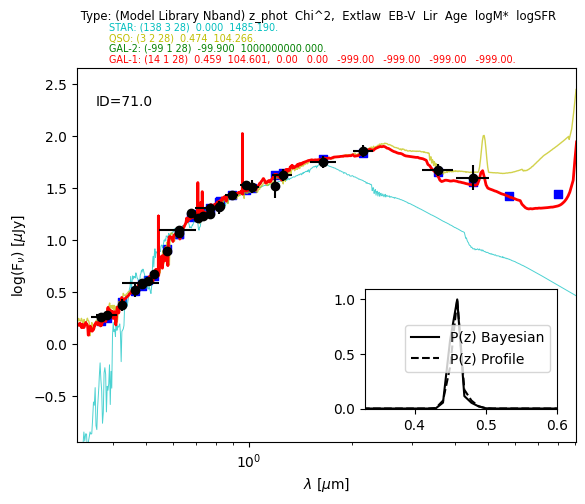

File: save_spec/Id12.0.spec


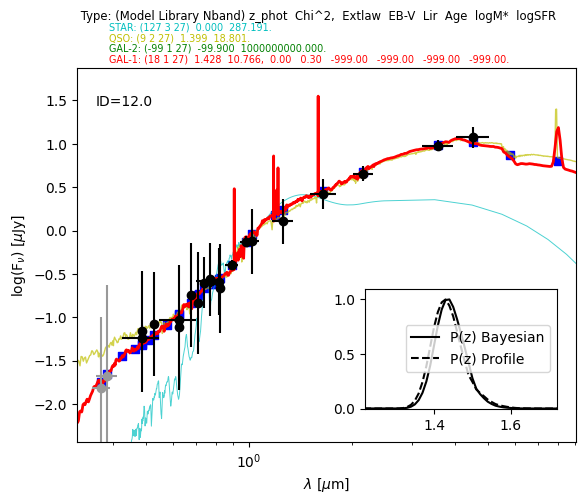

File: save_spec/Id33.0.spec


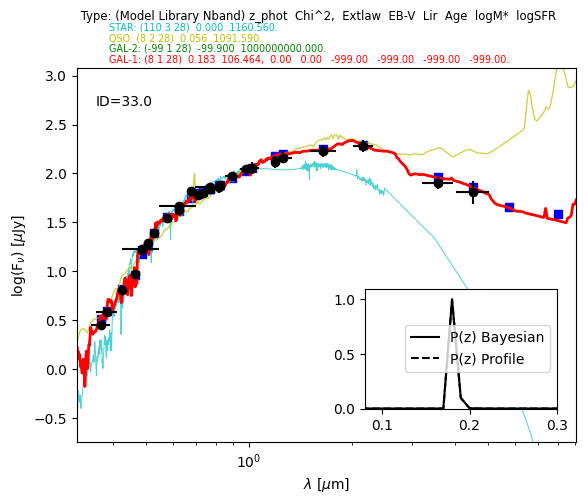

File: save_spec/Id50.0.spec


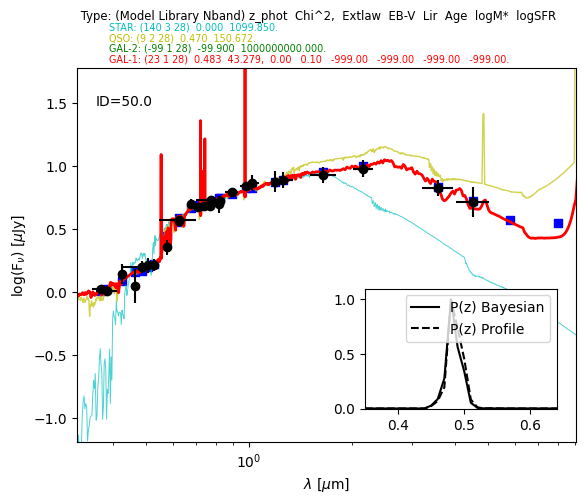

File: save_spec/Id21.0.spec


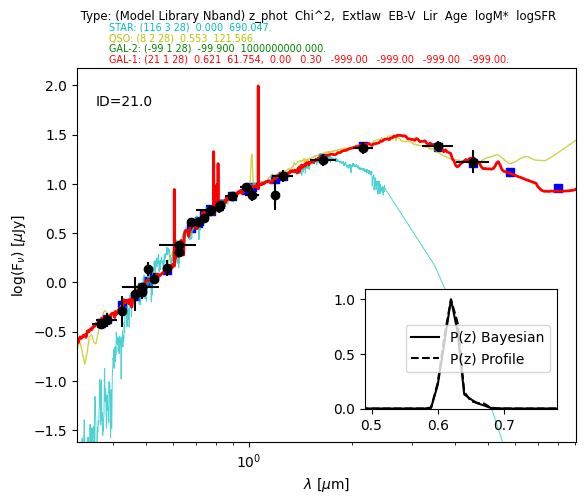

File: save_spec/Id42.0.spec


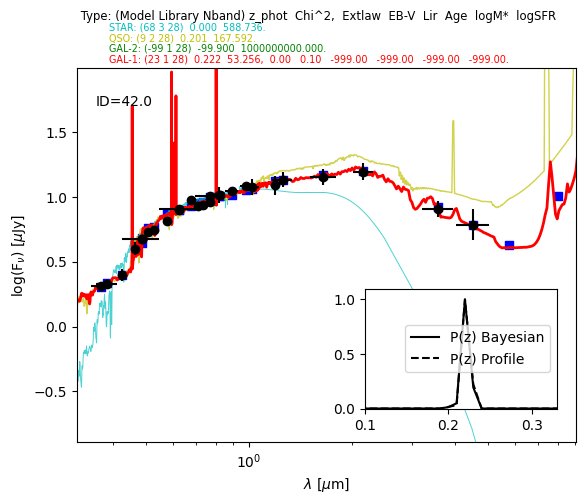

File: save_spec/Id17.0.spec


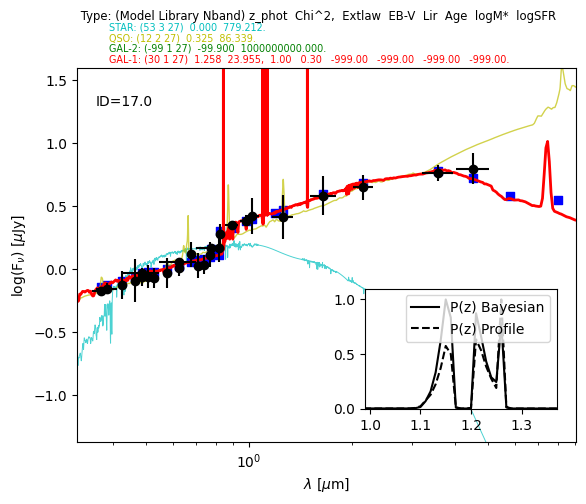

File: save_spec/Id74.0.spec


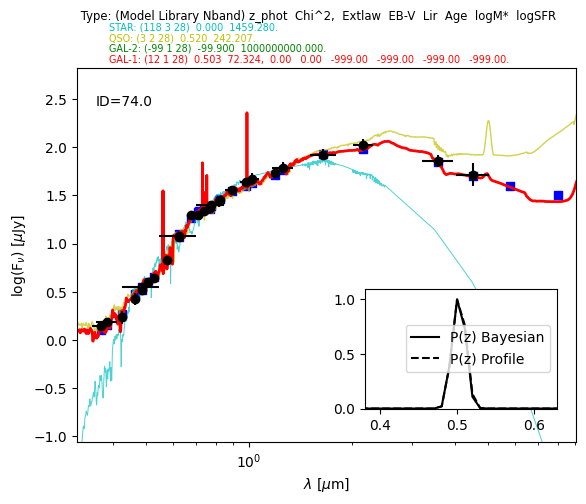

File: save_spec/Id78.0.spec


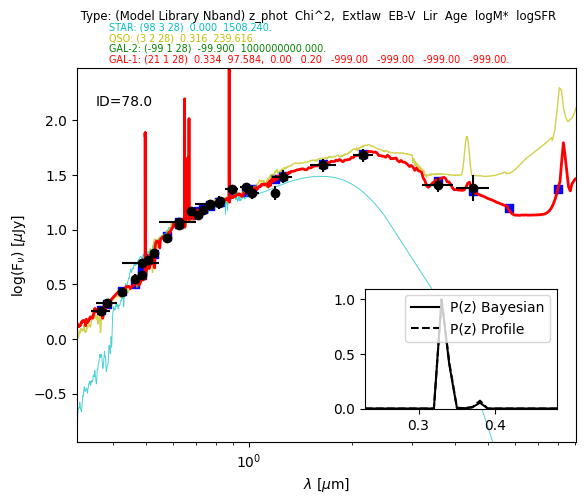

File: save_spec/Id66.0.spec


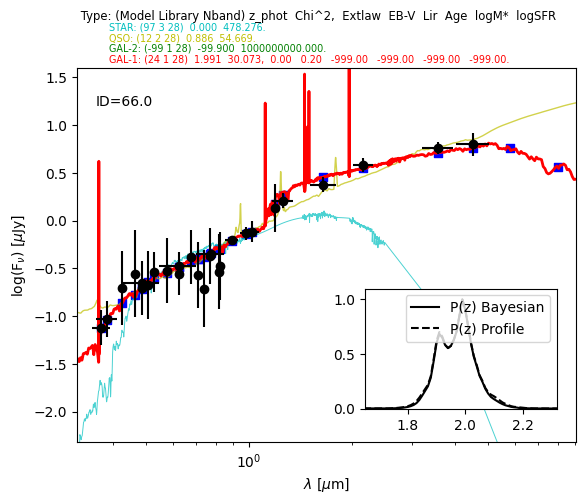

File: save_spec/Id95.0.spec


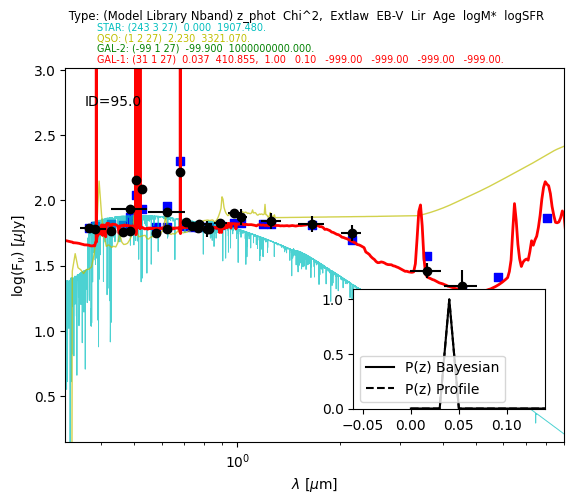

File: save_spec/Id87.0.spec


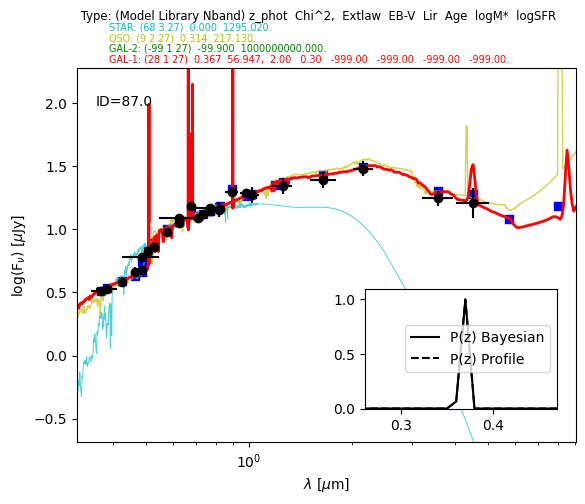

File: save_spec/Id6.0.spec


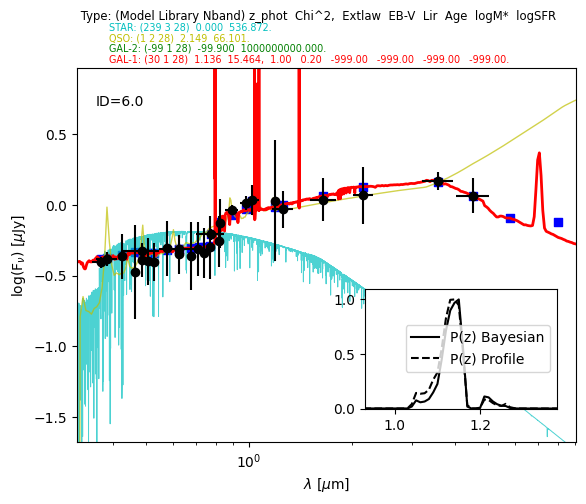

File: save_spec/Id99.0.spec


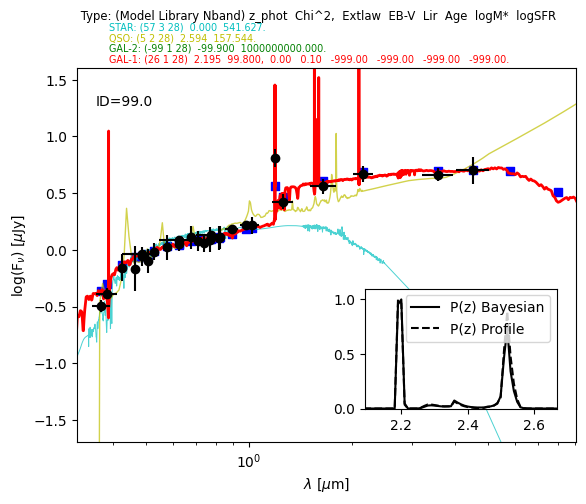

File: save_spec/Id85.0.spec


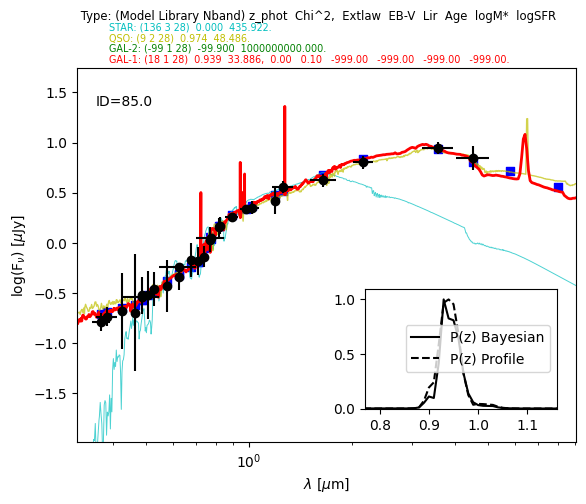

File: save_spec/Id4.0.spec


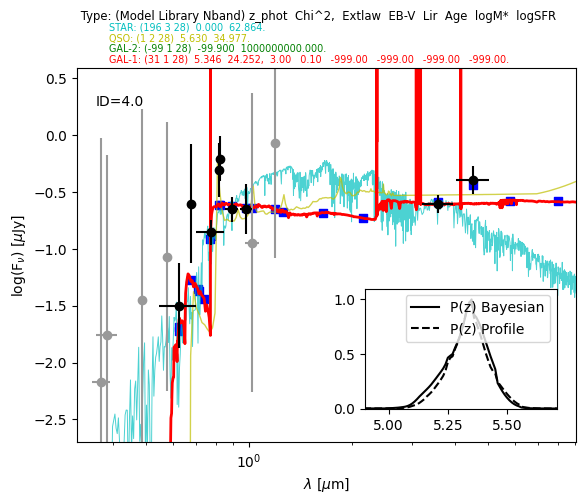

File: save_spec/Id89.0.spec


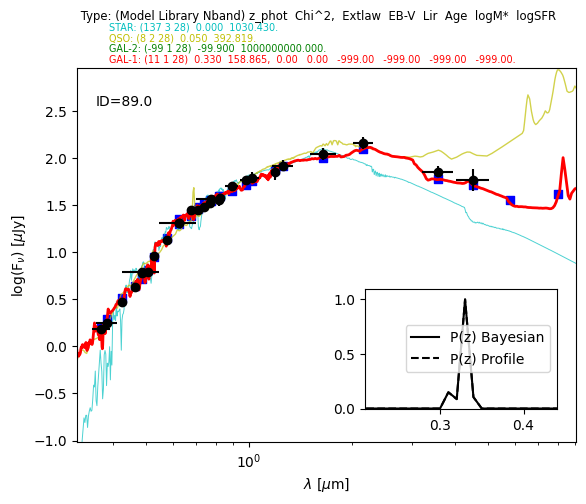

File: save_spec/Id8.0.spec


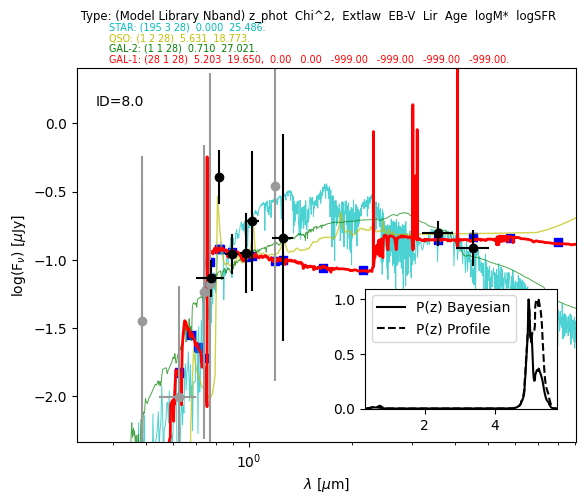

File: save_spec/Id97.0.spec


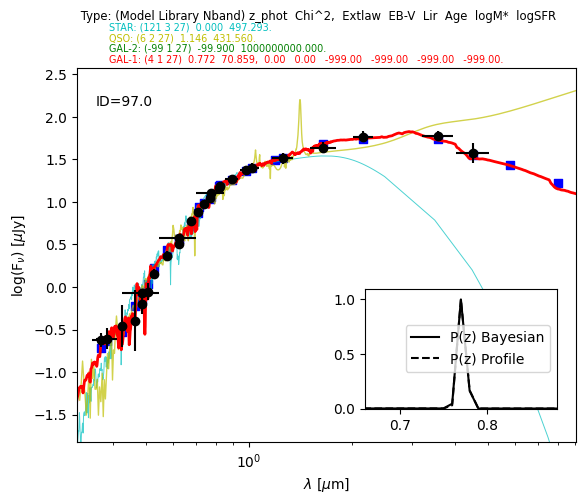

File: save_spec/Id40.0.spec


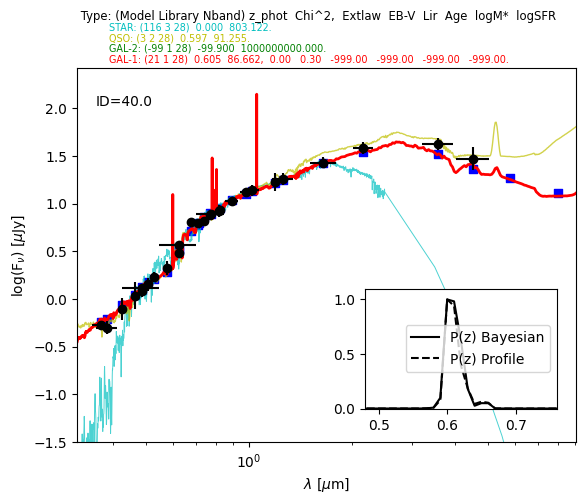

File: save_spec/Id23.0.spec


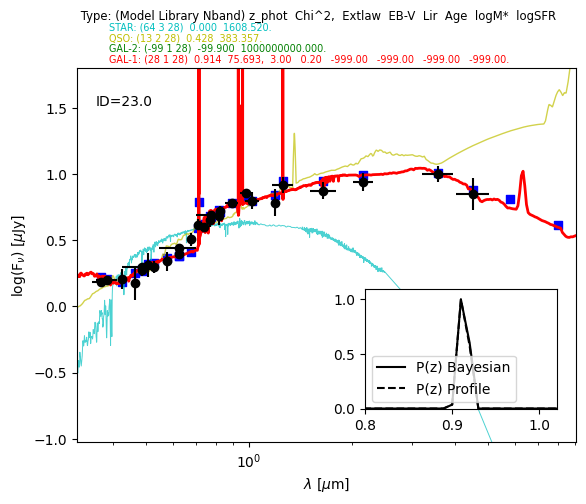

File: save_spec/Id52.0.spec


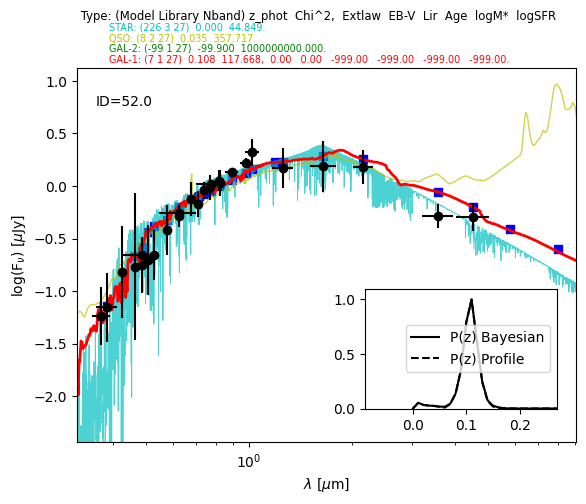

File: save_spec/Id31.0.spec


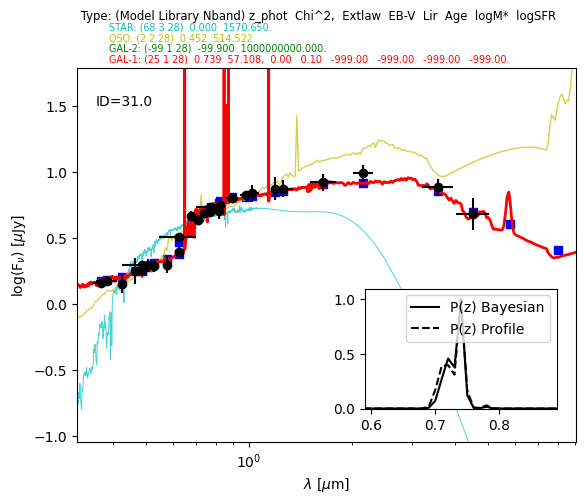

File: save_spec/Id19.0.spec


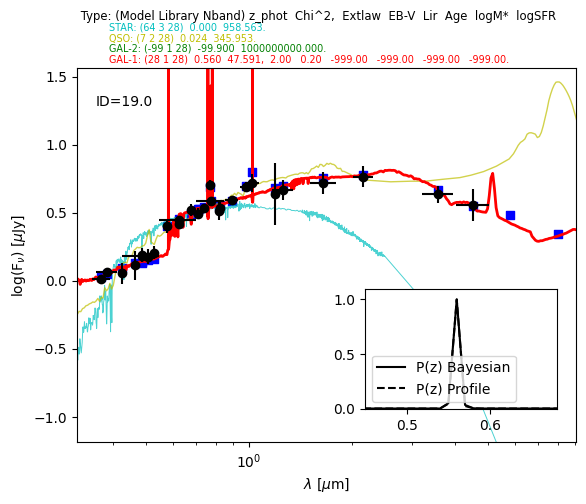

File: save_spec/Id64.0.spec


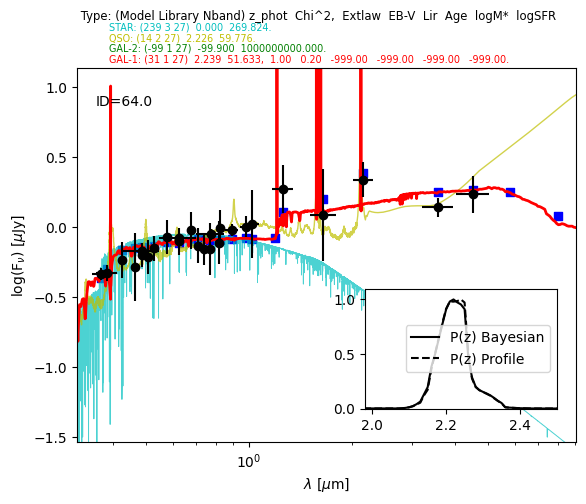

File: save_spec/Id76.0.spec


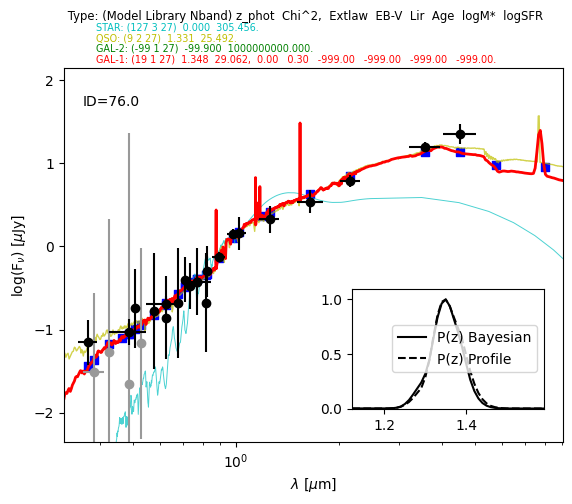

File: save_spec/Id15.0.spec


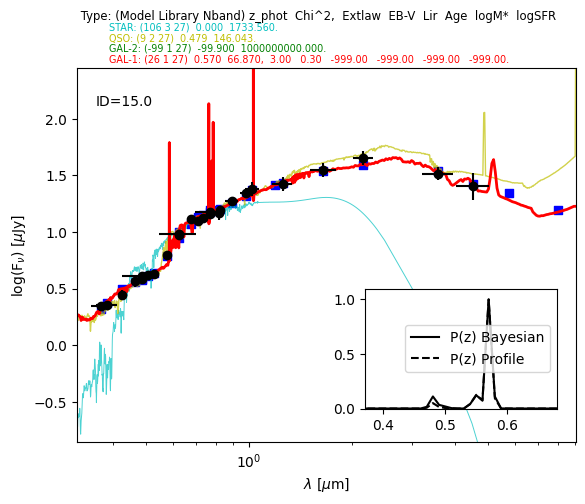

File: save_spec/Id68.0.spec


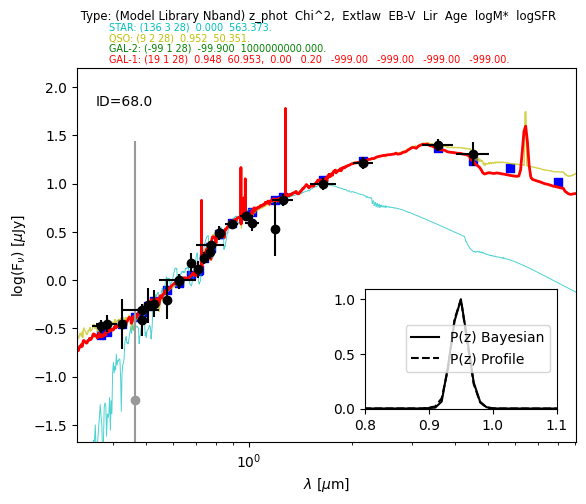

File: save_spec/Id93.0.spec


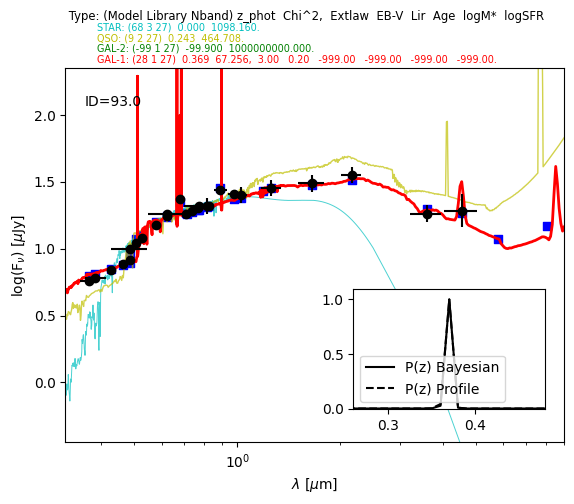

File: save_spec/Id81.0.spec


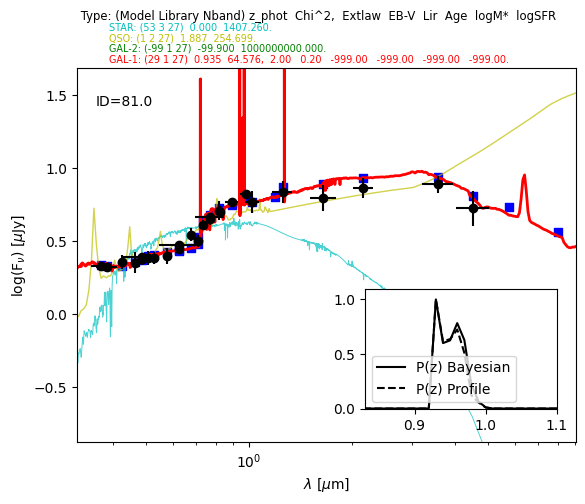

File: save_spec/Id72.0.spec


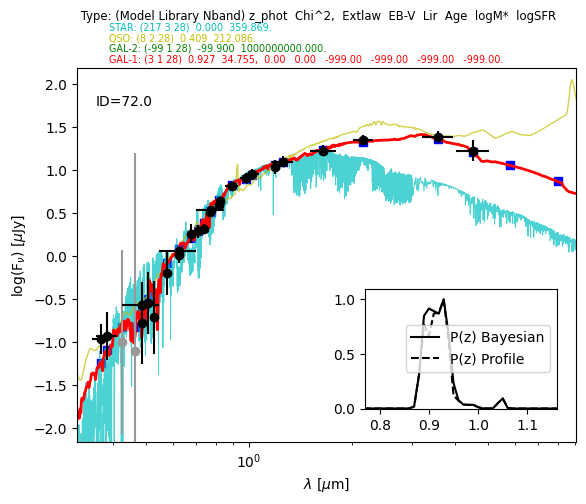

File: save_spec/Id11.0.spec


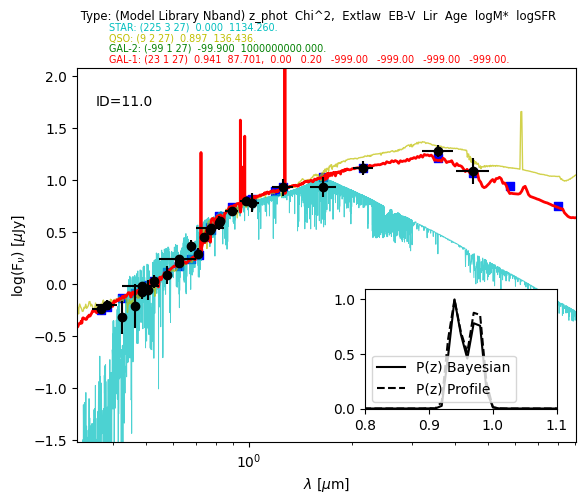

File: save_spec/Id60.0.spec


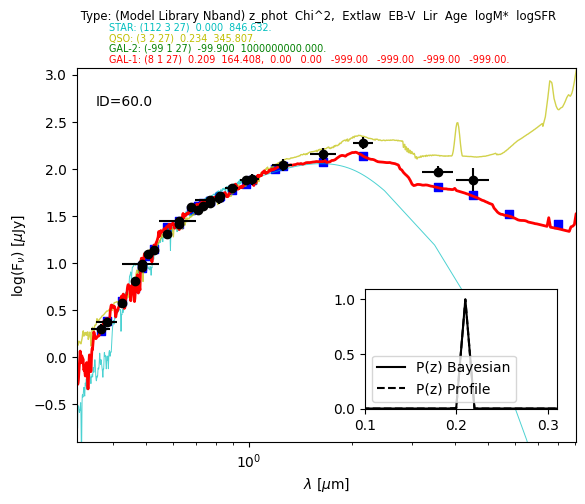

File: save_spec/Id56.0.spec


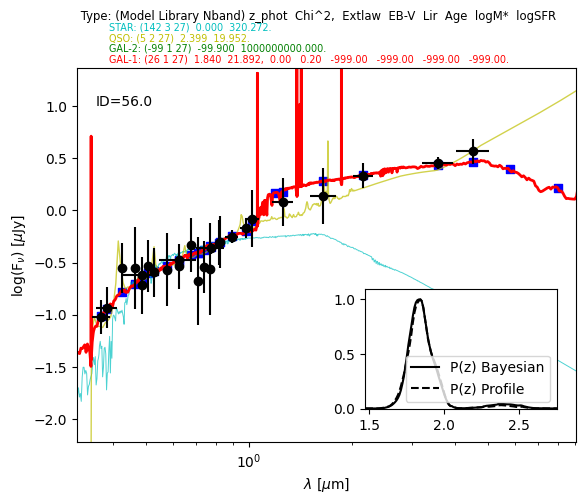

File: save_spec/Id48.0.spec


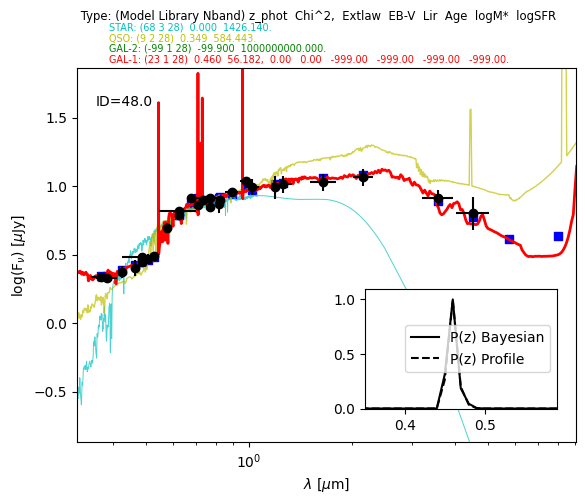

File: save_spec/Id35.0.spec


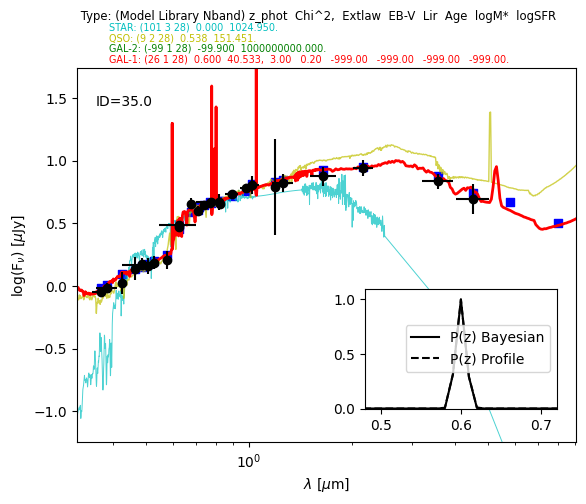

File: save_spec/Id44.0.spec


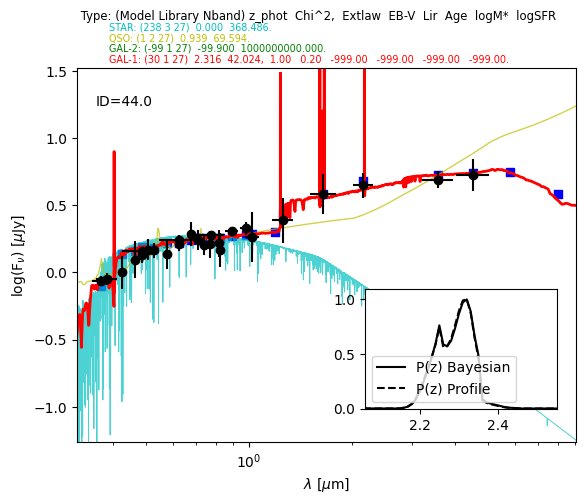

File: save_spec/Id39.0.spec


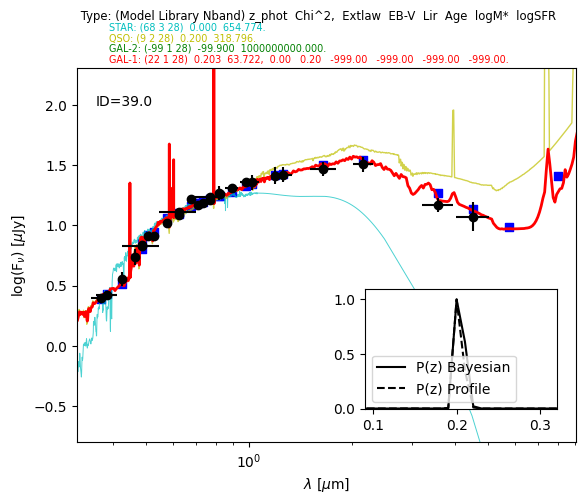

File: save_spec/Id27.0.spec


In [ ]:
from os import listdir
from os.path import isfile, join

listname = [f for f in listdir("save_spec") if isfile(join("save_spec", f))]
for namefile in listname:
    lp.plotspec("save_spec/" + str(namefile))